In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zscore as zip
from scipy import stats
from scipy.stats import zscore

In [5]:
data = pd.read_csv('../data/benin-malanville.csv', sep='[,;:]' ,index_col=False)
data.head(10)

C:\Users\USED\AppData\Local\Temp\ipykernel_14692\3832594567.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('../data/benin-malanville.csv', sep='[,;:]' ,index_col=False)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00,1,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00,2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00,3,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00,4,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00,5,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
5,2021-08-09 00,6,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3
6,2021-08-09 00,7,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3
7,2021-08-09 00,8,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3
8,2021-08-09 00,9,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4
9,2021-08-09 00,10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4


In [6]:
data.columns 

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [7]:
data.shape

(525600, 19)

In [8]:
data.dtypes

Timestamp         object
GHI                int64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP               float64
Cleaning           int64
Precipitation      int64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [9]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,29.500000,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,17.318119,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.000000,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,14.750000,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,29.500000,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,44.250000,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,59.000000,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [10]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00,1,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00,2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00,3,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00,4,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00,5,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [12]:
summary_stats = data.describe()

In [13]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00,1,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00,2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00,3,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00,4,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00,5,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [14]:
modes = data.mode().iloc[0]

In [15]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00,1,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00,2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00,3,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00,4,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00,5,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [19]:
data= data[['Timestamp', 'GHI', 'DNI', 
      'DHI', 'ModA', 'ModB', 'Tamb', 
      'RH', 'WS','WSgust', 'WSstdev', 
      'WD', 'WDstdev', 'BP', 'Cleaning', 
      #'Precipitation',
      #'TModA', 
       'TModB', 'Comments'
      ]].copy()

In [20]:
data.dtypes

Timestamp     object
GHI            int64
DNI          float64
DHI          float64
ModA         float64
ModB         float64
Tamb         float64
RH           float64
WS           float64
WSgust       float64
WSstdev      float64
WD           float64
WDstdev      float64
BP           float64
Cleaning       int64
TModB        float64
Comments     float64
dtype: object

In [18]:
#data.drop(['Precipitation'], axis=1)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,TModA,TModB,Comments
0,2021-08-09 00,1,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0.0,26.3,26.2
1,2021-08-09 00,2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0.0,26.3,26.2
2,2021-08-09 00,3,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0.0,26.4,26.2
3,2021-08-09 00,4,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0.0,26.4,26.3
4,2021-08-09 00,5,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0.0,26.4,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23,56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0.0,23.5,22.9
525596,2022-08-08 23,57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0.0,23.5,22.9
525597,2022-08-08 23,58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0.0,23.5,22.9
525598,2022-08-08 23,59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0.0,23.5,22.9


In [22]:
data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'TModB',
       'Comments'],
      dtype='object')

In [23]:
data.head

<bound method NDFrame.head of             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH    WS  WSgust  \
0       2021-08-09 00    1 -1.2 -0.2  -1.1   0.0   0.0  26.2  93.4     0.0   
1       2021-08-09 00    2 -1.1 -0.2  -1.1   0.0   0.0  26.2  93.6     0.0   
2       2021-08-09 00    3 -1.1 -0.2  -1.1   0.0   0.0  26.2  93.7     0.3   
3       2021-08-09 00    4 -1.1 -0.1  -1.0   0.0   0.0  26.2  93.3     0.2   
4       2021-08-09 00    5 -1.0 -0.1  -1.0   0.0   0.0  26.2  93.3     0.1   
...               ...  ...  ...  ...   ...   ...   ...   ...   ...     ...   
525595  2022-08-08 23   56 -5.5 -0.1  -5.9   0.0   0.0  23.1  98.3     0.3   
525596  2022-08-08 23   57 -5.5 -0.1  -5.8   0.0   0.0  23.1  98.3     0.2   
525597  2022-08-08 23   58 -5.5 -0.1  -5.8   0.0   0.0  23.1  98.4     0.6   
525598  2022-08-08 23   59 -5.5 -0.1  -5.8   0.0   0.0  23.1  98.3     0.9   
525599  2022-08-09 00    0 -5.5 -0.1  -5.7   0.0   0.0  23.1  98.3     1.2   

        WSstdev   WD  WDstdev   B

In [25]:
data.isna().sum()

Timestamp    0
GHI          0
DNI          0
DHI          0
ModA         0
ModB         0
Tamb         0
RH           0
WS           0
WSgust       0
WSstdev      0
WD           0
WDstdev      0
BP           0
Cleaning     0
TModB        0
Comments     0
dtype: int64

In [27]:
data.loc[data.duplicated()]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,TModB,Comments


In [28]:
data.loc[data.duplicated(subset=['DNI'])]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,TModB,Comments
2,2021-08-09 00,3,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,26.4,26.2
3,2021-08-09 00,4,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,26.4,26.3
5,2021-08-09 00,6,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,26.4,26.3
6,2021-08-09 00,7,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,26.5,26.3
7,2021-08-09 00,8,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,26.5,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23,56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,23.5,22.9
525596,2022-08-08 23,57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,23.5,22.9
525597,2022-08-08 23,58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,23.5,22.9
525598,2022-08-08 23,59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,23.5,22.9


In [30]:
summary_stats = data.describe()

In [31]:
modes = data.mode().iloc[0]

In [33]:
IQR = summary_stats.loc['75%'] - summary_stats.loc['25%']

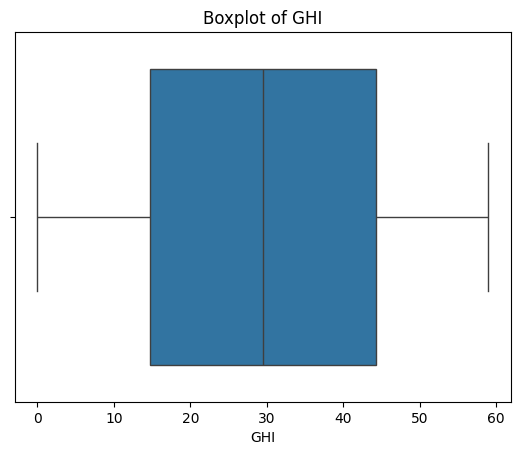

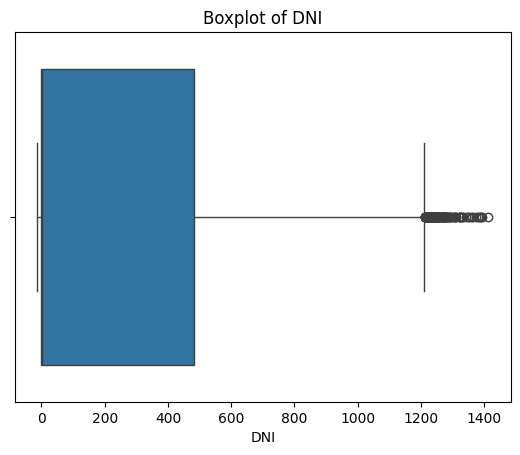

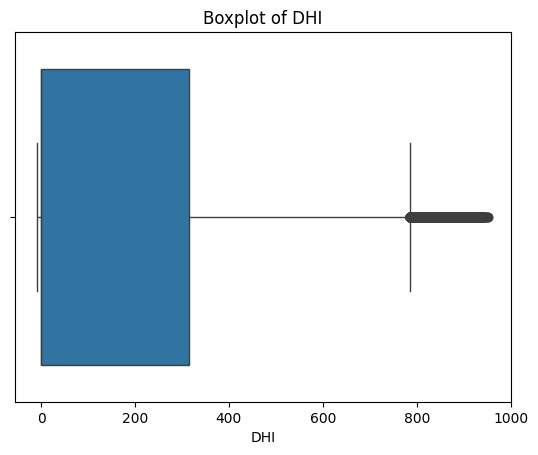

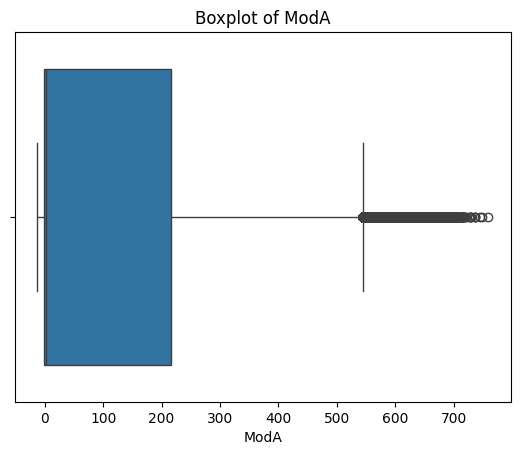

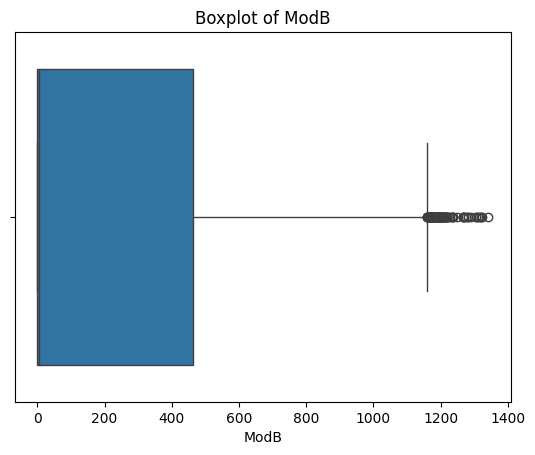

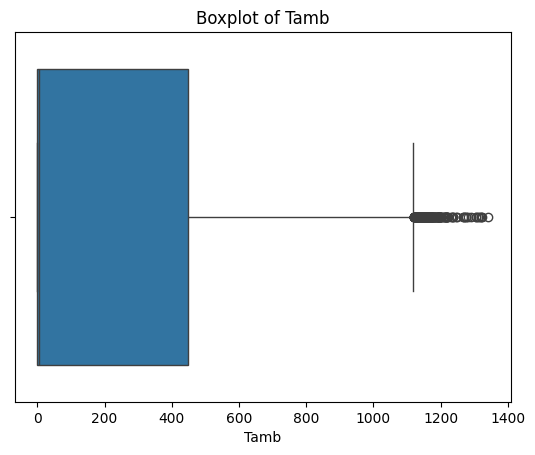

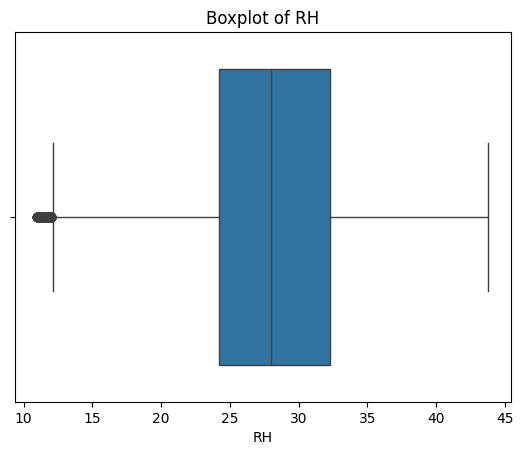

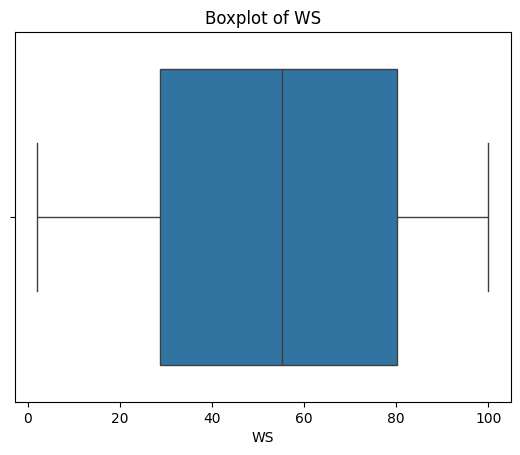

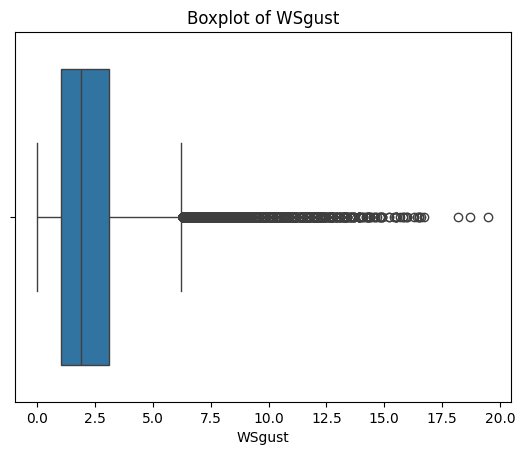

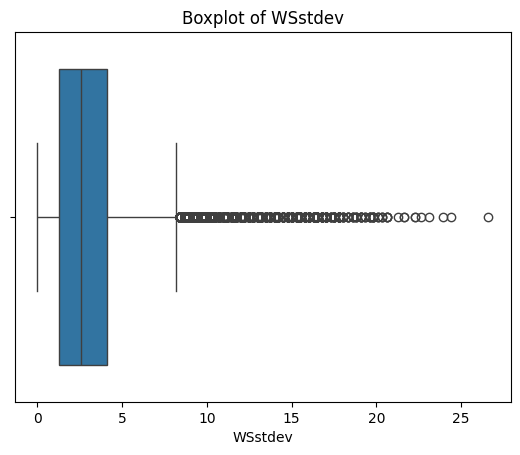

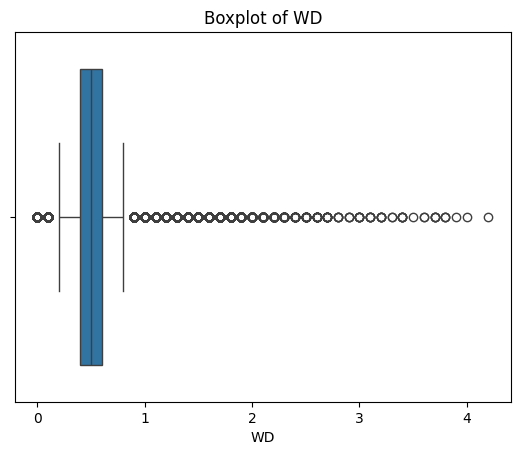

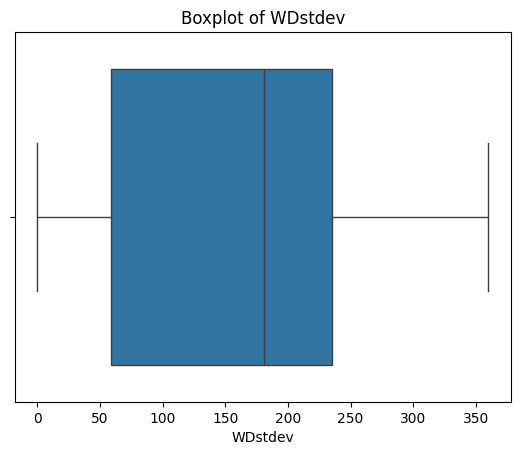

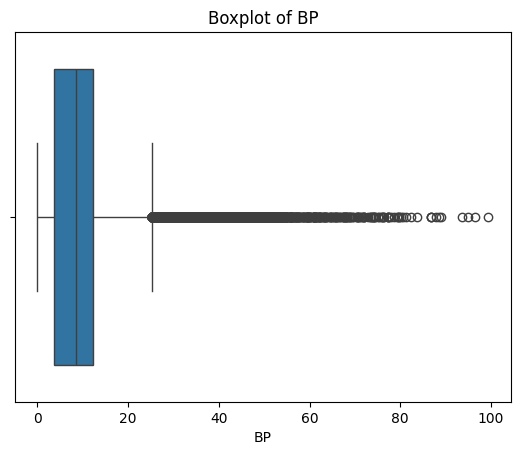

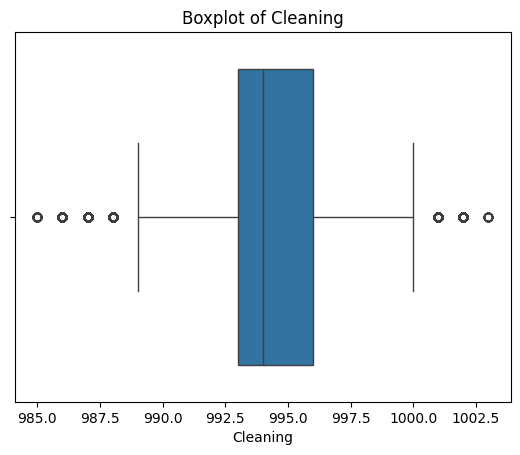

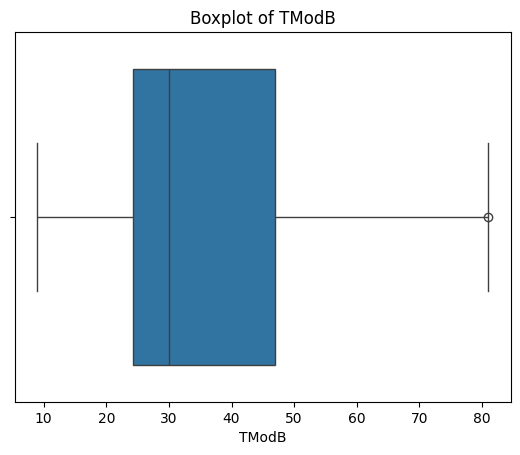

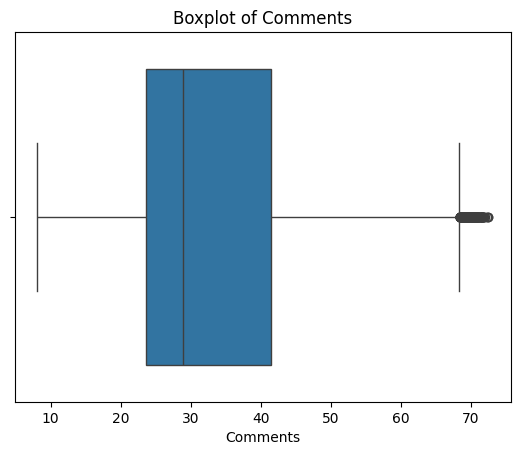

In [34]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

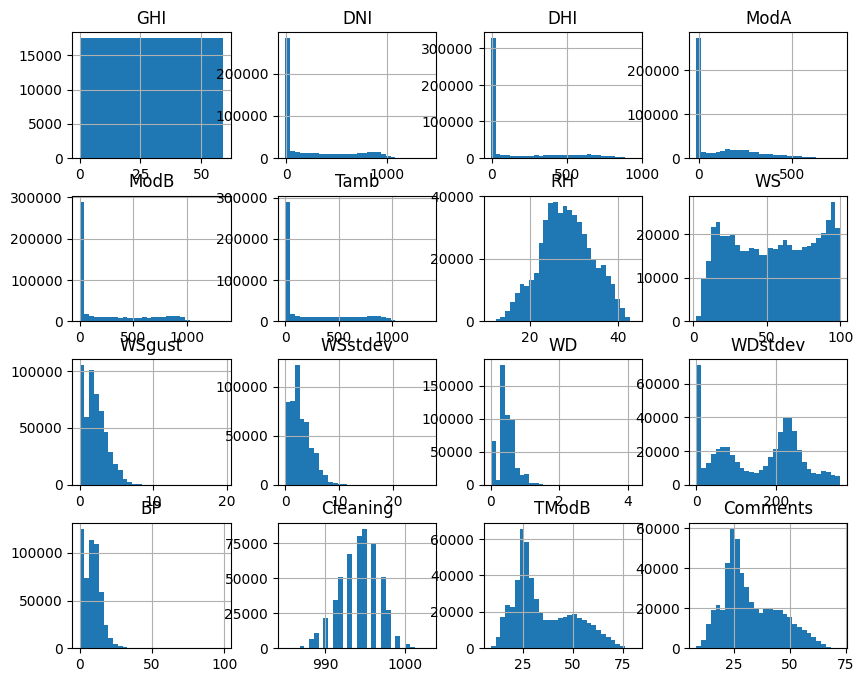

In [35]:
data.hist(figsize=(10, 8), bins=30)
plt.show()

In [37]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    print(f'Outliers in {column}:')
    print(outliers)

Outliers in GHI:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, TModB, Comments]
Index: []
Outliers in DNI:
            Timestamp  GHI     DNI    DHI   ModA    ModB    Tamb    RH    WS  \
671     2021-08-09 11   12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674     2021-08-09 11   15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11   17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849     2021-08-09 14   10  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850     2021-08-09 14   11  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...               ...  ...     ...    ...    ...     ...     ...   ...   ...   
522046  2022-08-06 12   47  1218.0  619.7  580.5  1130.0  1128.0  30.3  70.7   
522067  2022-08-06 13    8  1218.0  724.9  477.8  1137.0  1133.0  30.5  67.3   
522073  2022-08-06 13   14  1218.0  759.1  446.2  1120.0  1112.0  30.9  66.3   
522074  2022-08-0

In [38]:
print(data.head())

       Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH    WS  WSgust  \
0  2021-08-09 00    1 -1.2 -0.2  -1.1   0.0   0.0  26.2  93.4     0.0   
1  2021-08-09 00    2 -1.1 -0.2  -1.1   0.0   0.0  26.2  93.6     0.0   
2  2021-08-09 00    3 -1.1 -0.2  -1.1   0.0   0.0  26.2  93.7     0.3   
3  2021-08-09 00    4 -1.1 -0.1  -1.0   0.0   0.0  26.2  93.3     0.2   
4  2021-08-09 00    5 -1.0 -0.1  -1.0   0.0   0.0  26.2  93.3     0.1   

   WSstdev   WD  WDstdev   BP  Cleaning  TModB  Comments  
0      0.4  0.1    122.1  0.0       998   26.3      26.2  
1      0.0  0.0      0.0  0.0       998   26.3      26.2  
2      1.1  0.5    124.6  1.5       997   26.4      26.2  
3      0.7  0.4    120.3  1.3       997   26.4      26.3  
4      0.7  0.3    113.2  1.0       997   26.4      26.3  


In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  525600 non-null  object 
 1   GHI        525600 non-null  int64  
 2   DNI        525600 non-null  float64
 3   DHI        525600 non-null  float64
 4   ModA       525600 non-null  float64
 5   ModB       525600 non-null  float64
 6   Tamb       525600 non-null  float64
 7   RH         525600 non-null  float64
 8   WS         525600 non-null  float64
 9   WSgust     525600 non-null  float64
 10  WSstdev    525600 non-null  float64
 11  WD         525600 non-null  float64
 12  WDstdev    525600 non-null  float64
 13  BP         525600 non-null  float64
 14  Cleaning   525600 non-null  int64  
 15  TModB      525600 non-null  float64
 16  Comments   525600 non-null  float64
dtypes: float64(14), int64(2), object(1)
memory usage: 68.2+ MB
None


In [40]:
missing_values = data.isnull().sum()
print(missing_values)

Timestamp    0
GHI          0
DNI          0
DHI          0
ModA         0
ModB         0
Tamb         0
RH           0
WS           0
WSgust       0
WSstdev      0
WD           0
WDstdev      0
BP           0
Cleaning     0
TModB        0
Comments     0
dtype: int64


In [41]:
for column in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {data[column].unique()}")

Unique values in Timestamp: ['2021-08-09 00' '2021-08-09 01' '2021-08-09 02' ... '2022-08-08 22'
 '2022-08-08 23' '2022-08-09 00']


In [43]:

data = pd.read_csv('../data/benin-malanville.csv')


In [47]:
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

NameError: name 'daily_data' is not defined

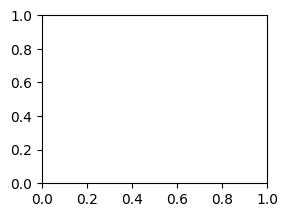

In [48]:
plt.subplot(2, 2, 1)
plt.plot(daily_data.index, daily_data['GHI'], label='GHI', color='blue')
plt.title('Daily Global Horizontal Irradiance (GHI)')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

NameError: name 'daily_data' is not defined

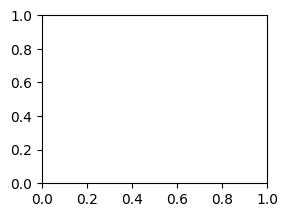

In [49]:
plt.subplot(2, 2, 2)
plt.plot(daily_data.index, daily_data['DNI'], label='DNI', color='green')
plt.title('Daily Direct Normal Irradiance (DNI)')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

NameError: name 'daily_data' is not defined

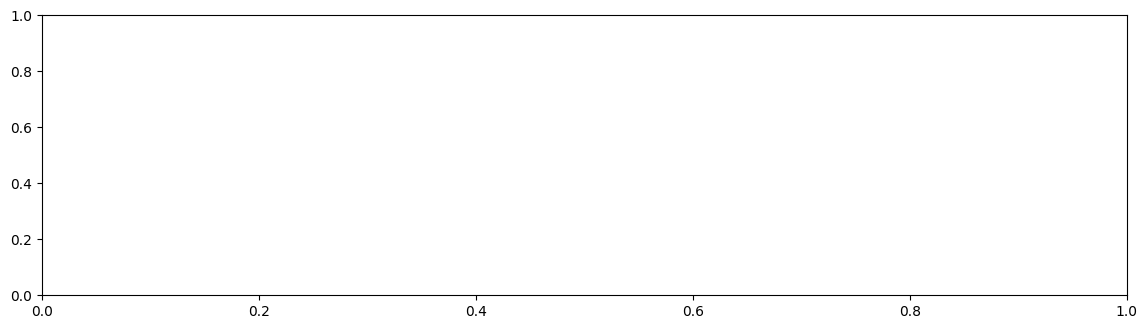

In [50]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.stackplot(daily_data.index, daily_data['GHI'], daily_data['DNI'], daily_data['DHI'], labels=['GHI', 'DNI', 'DHI'], colors=['blue', 'green', 'red'])
plt.title('Daily Solar Irradiance Components')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.fill_between(daily_data.index, daily_data['Tamb'], color='orange', alpha=0.5)
plt.title('Daily Ambient Temperature (Tamb)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

In [52]:
print(data['Cleaning'].unique())

[0 1]


In [53]:
cleaned_data = data[data['Cleaning'] == 1]
not_cleaned_data = data[data['Cleaning'] == 0]

KeyError: 'Datetime'

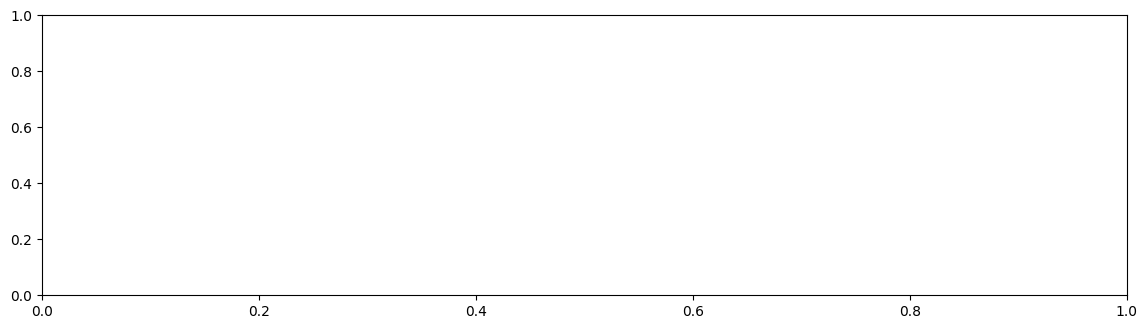

In [54]:
plt.figure(figsize=(14, 8))

# Plot ModA over time
plt.subplot(2, 1, 1)
plt.plot(data['Datetime'], data['ModA'], label='ModA', color='blue')
plt.scatter(cleaned_data['Datetime'], cleaned_data['ModA'], color='red', label='Cleaning Event', s=10)
plt.title('Sensor ModA Readings Over Time')
plt.xlabel('Date')
plt.ylabel('ModA Reading')
plt.legend()
plt.grid(True)

In [55]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [57]:
print(data.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [58]:
plt.figure(figsize=(14, 10))


<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

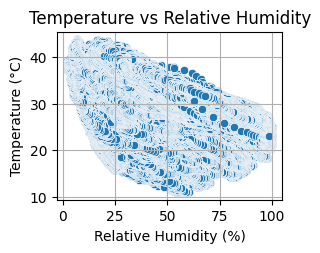

In [59]:
plt.subplot(2, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=data)
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

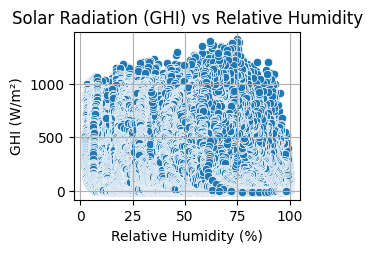

In [60]:
plt.subplot(2, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=data)
plt.title('Solar Radiation (GHI) vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

Text(0, 0.5, 'Frequency')

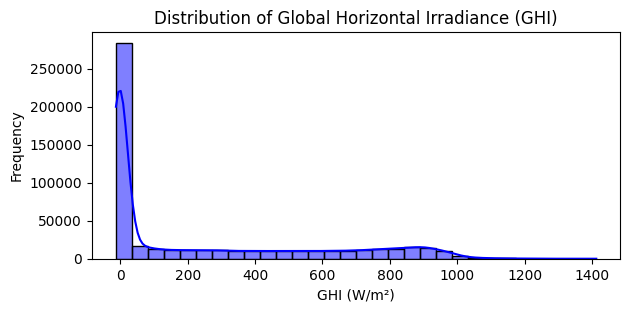

In [61]:
plt.figure(figsize=(15, 10))

# Histogram for Global Horizontal Irradiance (GHI)
plt.subplot(3, 2, 1)
sns.histplot(data['GHI'], kde=True, color='blue', bins=30)
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

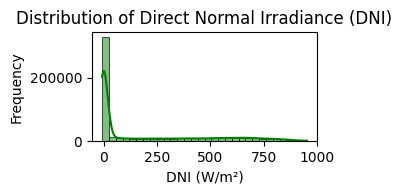

In [62]:
# Histogram for Direct Normal Irradiance (DNI)
plt.subplot(3, 2, 2)
sns.histplot(data['DNI'], kde=True, color='green', bins=30)
plt.title('Distribution of Direct Normal Irradiance (DNI)')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

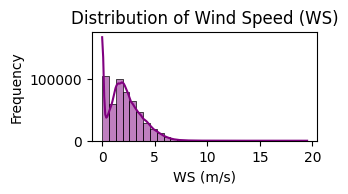

In [63]:
plt.subplot(3, 2, 4)
sns.histplot(data['WS'], kde=True, color='purple', bins=30)
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

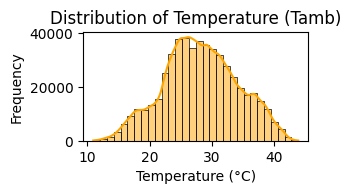

In [64]:
plt.subplot(3, 2, 5)
sns.histplot(data['Tamb'], kde=True, color='orange', bins=30)
plt.title('Distribution of Temperature (Tamb)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

In [65]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [67]:
# Calculate Z-scores for the selected variables
data['GHI_Z'] = zscore(data['GHI'])
data['DNI_Z'] = zscore(data['DNI'])
data['DHI_Z'] = zscore(data['DHI'])
data['WS_Z'] = zscore(data['WS'])
data['Tamb_Z'] = zscore(data['Tamb'])

NameError: name 'zscore' is not defined